In [1]:
import torch
import torch.nn as nn
import time

In [2]:
from src.datasources.unityeyes import UnityEyesDataset
from src.configs import cfg
import src.models.gaze_hrnet as gaze_hrnet

In [3]:
dataset_path = 'G:\\Datasets\\UnityEyes_Windows\\480x640'
u_dataset = UnityEyesDataset(dataset_path, cfg, is_train=True, random_difficulty=True, generate_heatmaps=True)
print(u_dataset.__len__())

1000000


In [4]:
from torch.utils.data import DataLoader
u_dataloader = DataLoader(u_dataset, shuffle=True, batch_size=16, num_workers=1)

In [5]:
start = time.perf_counter()
i = 0
for one_batch in u_dataloader:
    u_onebatch = one_batch
    i += 1
    if i == 1:
        break
print(time.perf_counter() - start)

4.800742899999989


tensor([ 0.6155, -0.2443])
tensor([[22.8088, 49.3872],
        [27.9835, 29.7426],
        [62.1957, 15.0394],
        [90.4882, 36.1556],
        [92.6350, 62.3970],
        [91.8519, 65.7114],
        [66.2086, 61.4794],
        [35.8330, 57.5943],
        [29.8760, 28.1668],
        [35.8379, 14.7102],
        [52.2031, 10.1118],
        [69.3850, 17.0651],
        [77.3187, 31.4972],
        [71.3568, 44.9538],
        [54.9916, 49.5523],
        [37.8097, 42.5989],
        [54.5862, 26.9432],
        [44.7999, 55.5533]])
tensor(49.5518)


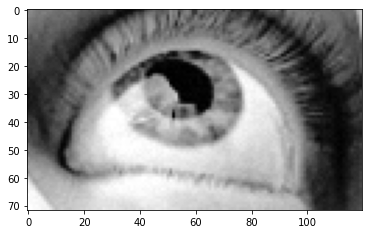

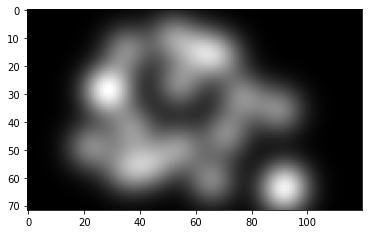

In [6]:
import matplotlib.pyplot as plt 
n = 9
plt.figure()
plt.imshow(u_onebatch['eye'][n][0], cmap='gray')
heatmap = torch.zeros((72, 120))
for i in range(18):
    heatmap += u_onebatch['heatmaps'][n][i]
    # plt.figure()
    # plt.imshow(u_onebatch['heatmaps'][n][i], cmap='gray')
plt.figure()
plt.imshow(heatmap, cmap='gray')
print(u_onebatch['gaze'][n])
print(u_onebatch['landmarks'][n])
print(u_onebatch['radius'][n])

In [7]:
g = gaze_hrnet.get_gaze_net(cfg, True)

INFO:src.models.gaze_hrnet:=> init weights from normal distribution


In [8]:
pytorch_total_params = sum(p.numel() for p in g.parameters() if p.requires_grad)
pytorch_total_params

1571719

In [9]:
import cv2 as cv
import numpy as np

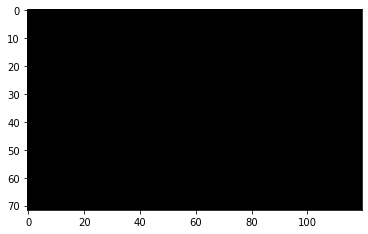

In [10]:
heatmap = heatmap.detach().numpy()
frame_2d = np.zeros((72, 120))
landmarks = u_onebatch['landmarks'][n].detach().numpy()
interior_landmarks = landmarks[0:8]
iris_landmarks = landmarks[8:16]
iris_centre = landmarks[-2]
eyeball_centre = landmarks[-1]
plt.imshow(frame_2d, cmap='gray')

In [11]:
# Should convert coordinates dtype to np.int32 or np.uint32.
cv.polylines(frame_2d, np.int32([interior_landmarks]), isClosed=True, color=(1, 1, 1), thickness=2)
cv.polylines(frame_2d, np.array([iris_landmarks], dtype='int32'), isClosed=True, color=(1, 1, 1), thickness=2)
cv.line(frame_2d, tuple(np.int32(eyeball_centre)), tuple(np.int32(iris_centre)), color=(1, 1, 1), thickness=2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1.0

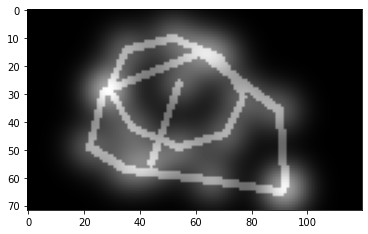

In [12]:
plt.imshow(frame_2d + heatmap, cmap='gray')
np.max(frame_2d)

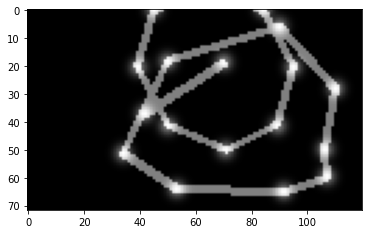

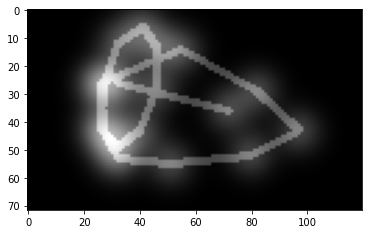

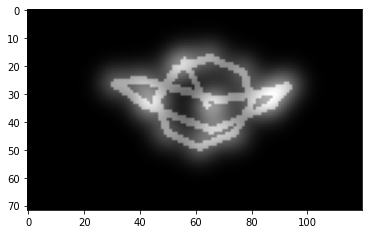

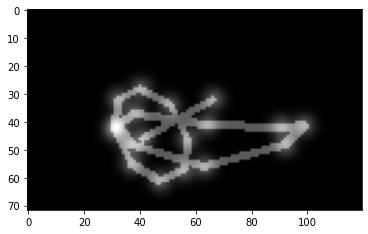

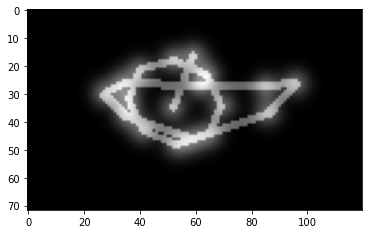

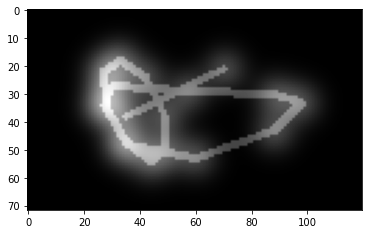

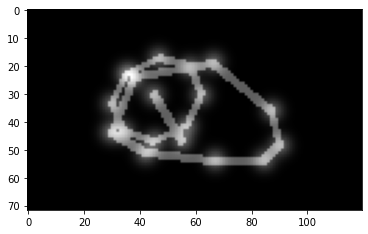

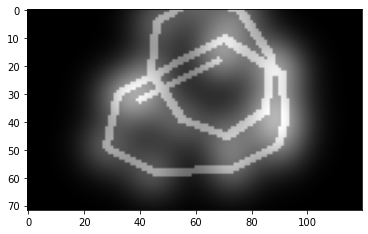

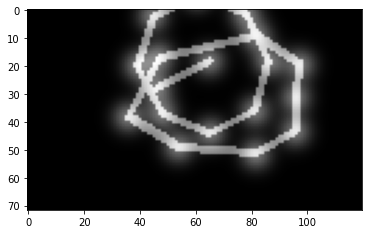

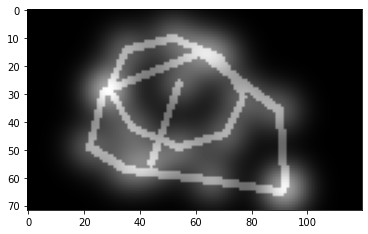

In [13]:
for i in range(10):
    heatmap = torch.zeros((72, 120))
    for j in range(18):
        heatmap += u_onebatch['heatmaps'][i][j]
    heatmap = heatmap.detach().numpy()
    frame_2d = np.zeros((72, 120))
    landmarks = u_onebatch['landmarks'][i].detach().numpy()
    interior_landmarks = landmarks[0:8]
    iris_landmarks = landmarks[8:16]
    iris_centre = landmarks[-2]
    eyeball_centre = landmarks[-1]
    # Should convert coordinates dtype to np.int32 or np.uint32.
    cv.polylines(frame_2d, np.int32([interior_landmarks]), isClosed=True, color=(1, 1, 1), thickness=2)
    cv.polylines(frame_2d, np.array([iris_landmarks], dtype='int32'), isClosed=True, color=(1, 1, 1), thickness=2)
    cv.line(frame_2d, tuple(np.int32(eyeball_centre)), tuple(np.int32(iris_centre)), color=(1, 1, 1), thickness=2)
    plt.figure()
    plt.imshow(frame_2d + heatmap, cmap='gray')